Добрый день. Приступик к проекту с того, что загрузим актуальные библиотеки и прочитаем актуальную базу данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
#from scipy import stats as st
from datetime import datetime, timedelta
from scipy.stats import f_oneway
#from scipy.stats import ttest_ind

In [2]:
sale = pd.read_excel('sale_ren.xlsx')

Проведу анализ предоставленных данных

In [3]:
sale.head(10)

,,Месяц начисления,Тип премии,Тип бизнеса,Канал продаж,Продукт,Агент,Срок полиса,Дата начала действия полиса,Премия по полису,Статус договора
0,1,2022-01-01,Единовременная,Новый бизнес,Агентская сеть,Кредитное страхование,Собственные агенты,до 3 лет,2022.01,1929842.75,Действует
1,2,2022-01-01,Единовременная,Новый бизнес,Брокерский,Кредитное страхование,Партнер 3,до 3 лет,2022.02,612509.00,Действует
2,3,2022-01-01,Единовременная,Новый бизнес,Агентская сеть,Кредитное страхование,Собственные агенты,5 лет,2022.02,14042288.00,Действует
3,4,2022-01-01,Единовременная,Новый бизнес,Брокерский,Кредитное страхование,Партнер 3,от 3 до 5 лет,2021.05,-24584.14,Расторгнут
4,5,2022-01-01,Премия первого года,Новый бизнес,Банковский,ДМС,Партнер 1,до 3 лет,2022.02,580140.40,Действует
5,6,2022-01-01,Премия первого года,Новый бизнес,Банковский,Накопительное страхование,Партнер 1,5 лет,2022.03,2125947.86,Действует
6,7,2022-01-01,Премия первого года,Новый бизнес,Банковский,ДМС,Партнер 1,до 3 лет,2022.02,449268.20,Действует
7,8,2022-01-01,Единовременная,Новый бизнес,Банковский,Кредитное страхование,Партнер 1,от 5 до 10 лет,2022.03,841479.89,Действует
8,9,2022-01-01,Премия первого года,Новый бизнес,Банковский,Накопительное страхование,Партнер 1,от 5 до 10 лет,2022.02,4720.28,Действует
9,10,2022-01-01,Премия первого года,Новый бизнес,Банковский,Накопительное страхование,Партнер 1,от 5 до 10 лет,2022.02,2579.45,Действует


Проверю качество предоставленных данных. Проверю дубликаты и пропуски

In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20675 entries, 0 to 20674
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0                                20675 non-null  int64         
 1   Месяц начисления             20675 non-null  datetime64[ns]
 2   Тип премии                   20675 non-null  object        
 3   Тип бизнеса                  20675 non-null  object        
 4   Канал продаж                 20675 non-null  object        
 5   Продукт                      20586 non-null  object        
 6   Агент                        20675 non-null  object        
 7   Срок полиса                  20675 non-null  object        
 8   Дата начала действия полиса  20675 non-null  float64       
 9   Премия по полису             20675 non-null  float64       
 10  Статус договора              20675 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1

In [5]:
sale.isna().sum()

                                0
Месяц начисления                0
Тип премии                      0
Тип бизнеса                     0
Канал продаж                    0
Продукт                        89
Агент                           0
Срок полиса                     0
Дата начала действия полиса     0
Премия по полису                0
Статус договора                 0
dtype: int64

Вижу, что в столбе "Продукты" есть 89 пропусков

In [6]:
'{:.1%}'.format((sale[sale['Продукт'].isna()].shape[0]/sale['Продукт'].shape[0]))

'0.4%'

Пропуски в "Продуктах" составляют 0,4% от общего колличества представленных строк. Предлагаю их удалить.

In [7]:
sale = sale.dropna(subset=['Продукт']).reset_index(drop=True)

In [8]:
display(sale[sale.duplicated ()])

,,Месяц начисления,Тип премии,Тип бизнеса,Канал продаж,Продукт,Агент,Срок полиса,Дата начала действия полиса,Премия по полису,Статус договора


Вижу, что некоторые столбы не соответствуют своему типу, приведу их к правильным типам

In [9]:
 sale['Дата начала действия полиса'] = sale['Дата начала действия полиса'].astype('datetime64[M]')

Привожу даты в стандартный вид

In [10]:
sale['Дата начала действия полиса'] = pd.to_datetime(sale['Дата начала действия полиса'])
sale['Месяц начисления'] = pd.to_datetime(sale['Месяц начисления'])

In [11]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20586 entries, 0 to 20585
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0                                20586 non-null  int64         
 1   Месяц начисления             20586 non-null  datetime64[ns]
 2   Тип премии                   20586 non-null  object        
 3   Тип бизнеса                  20586 non-null  object        
 4   Канал продаж                 20586 non-null  object        
 5   Продукт                      20586 non-null  object        
 6   Агент                        20586 non-null  object        
 7   Срок полиса                  20586 non-null  object        
 8   Дата начала действия полиса  20586 non-null  datetime64[ns]
 9   Премия по полису             20586 non-null  float64       
 10  Статус договора              20586 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1

Вывод по блоку проделанной работы:
Проверил полученные данные. Выявили незначительное колличество пропусков в столбе "Продукты" и удалили их и скорректировал типы данных для более удобной дальнейшей работы с данными.

Перейду к анализу бизнес показателей

Проведу оценку роста суммарной Премии по полису за время 

In [12]:
sale.groupby('Месяц начисления')[['Премия по полису']].count()

,Премия по полису
Месяц начисления,
2021-01-01,5298
2021-02-01,4178
2021-03-01,977
2022-01-01,2126
2022-02-01,3960
2022-03-01,4047


In [13]:
sale.groupby('Месяц начисления')[['Премия по полису']].sum()

,Премия по полису
Месяц начисления,
2021-01-01,1.361824e+09
2021-02-01,1.483933e+09
2021-03-01,8.529968e+07
2022-01-01,6.576950e+08
2022-02-01,8.818251e+08
2022-03-01,1.172976e+09


In [14]:
sale.groupby('Месяц начисления')[['Премия по полису']].mean()

,Премия по полису
Месяц начисления,
2021-01-01,257044.884388
2021-02-01,355177.867006
2021-03-01,87307.761566
2022-01-01,309357.956924
2022-02-01,222683.108944
2022-03-01,289838.293687


Построю график распределия продаж по полисам в разрезе месяца для наглядности

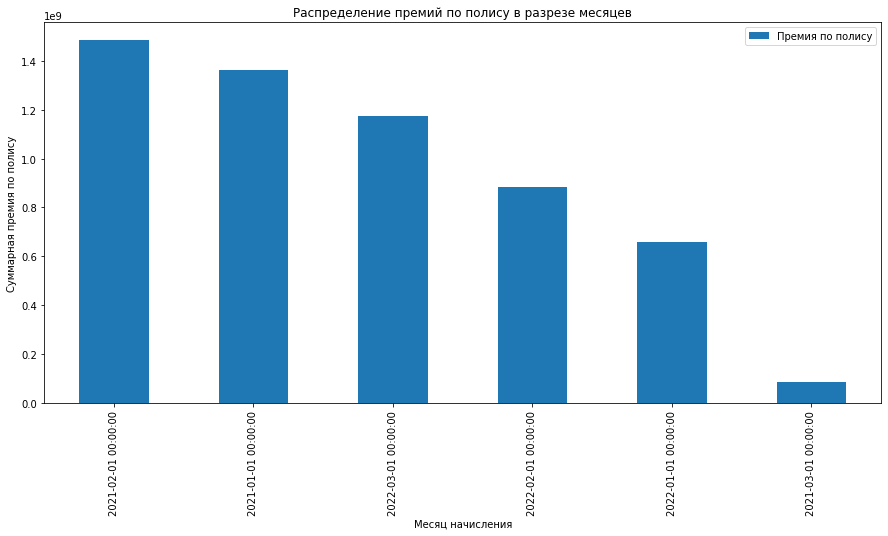

In [15]:
sale.groupby('Месяц начисления').agg({'Премия по полису' : 'sum'}).sort_values(
    by='Премия по полису', ascending=False).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Месяц начисления')
plt.ylabel('Суммарная премия по полису')
plt.title('Распределение премий по полису в разрезе месяцев');
plt.show()

Вывод: 
- Топ 3 месяца по колличеству продаж:  2021-01-01, 2021-02-01, 2022-03-01
- Топ 3 месяца по суммме продаж: 2021-02-01, 2021-01-01,2022-03-01	
- Топ 3 месяца по среднему "чеку": 2021-02-01, 2022-01-01,2022-03-01
Можем выделить явных лидеров по метрикам продаж: 2021-02-01, 2021-01-01,2022-03-01. Они лидеры по колличеству продаж и итоговой суммарной Премии по полисам

Построю таблицы распределия Премий по полисам для других зависимостей

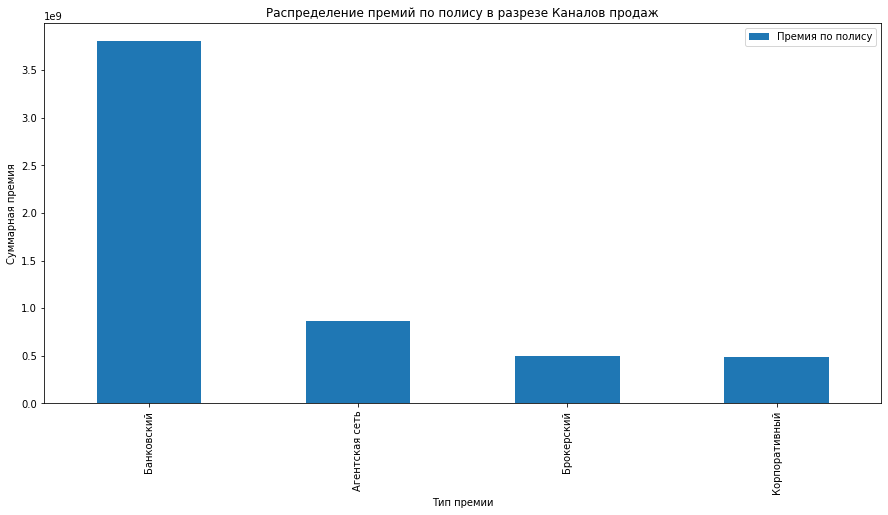

In [16]:
sale.groupby('Канал продаж').agg({'Премия по полису' : 'sum'}).sort_values(
    by='Премия по полису', ascending=False).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Тип премии')
plt.ylabel('Суммарная премия')
plt.title('Распределение премий по полису в разрезе Каналов продаж');
plt.show()

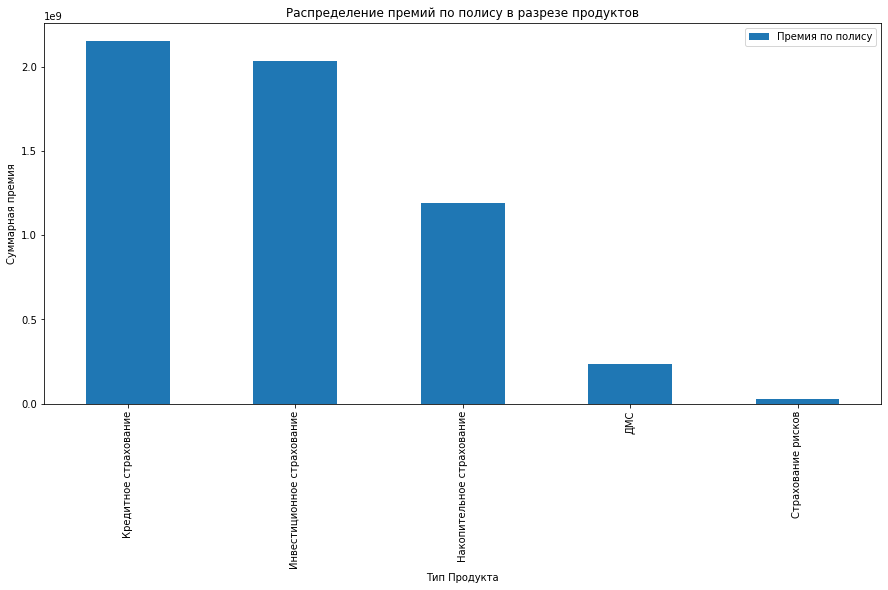

In [17]:
sale.groupby('Продукт').agg({'Премия по полису' : 'sum'}).sort_values(
    by='Премия по полису', ascending=False).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Тип Продукта')
plt.ylabel('Суммарная премия')
plt.title('Распределение премий по полису в разрезе продуктов');
plt.show()

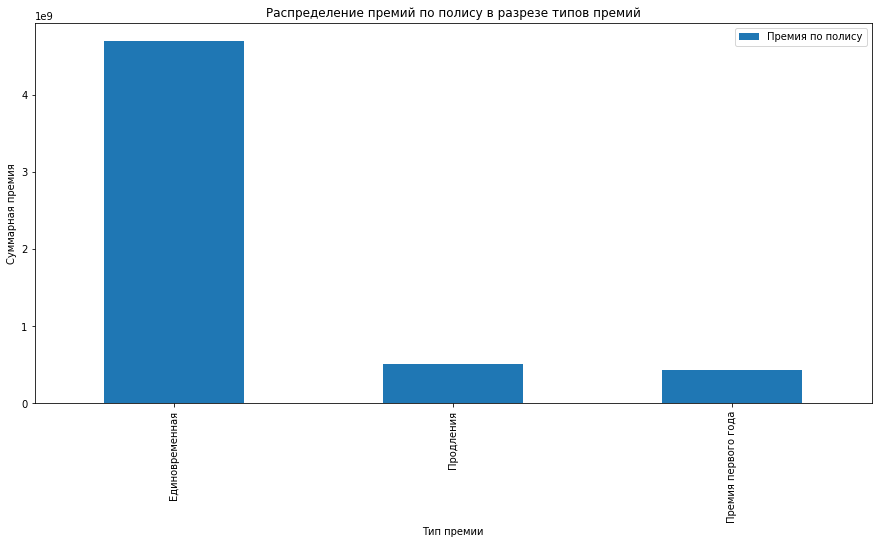

In [18]:
sale.groupby('Тип премии').agg({'Премия по полису' : 'sum'}).sort_values(
    by='Премия по полису', ascending=False).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Тип премии')
plt.ylabel('Суммарная премия')
plt.title('Распределение премий по полису в разрезе типов премий');
plt.show()

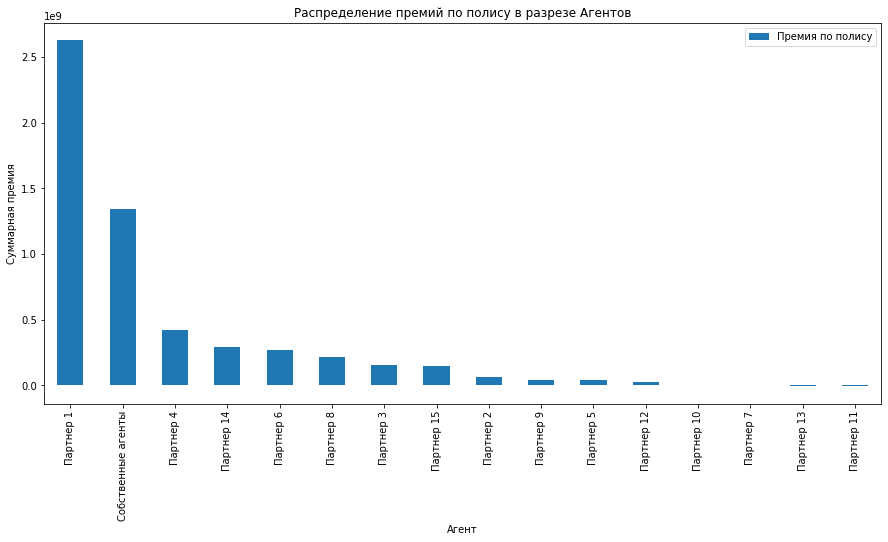

In [19]:
sale.groupby('Агент').agg({'Премия по полису' : 'sum'}).sort_values(
    by='Премия по полису', ascending=False).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Агент')
plt.ylabel('Суммарная премия')
plt.title('Распределение премий по полису в разрезе Агентов');
plt.show()

Построю диаграмму продаж для Партнера 1

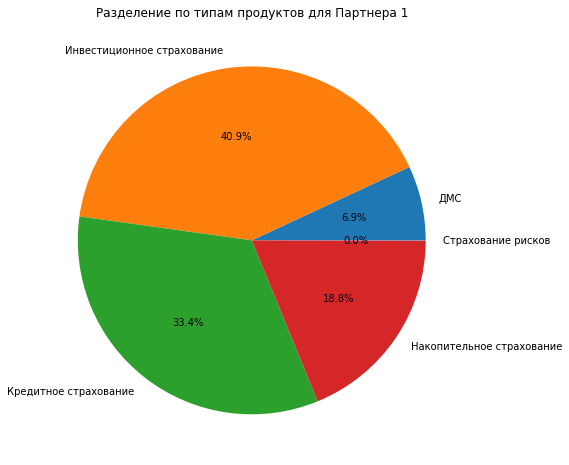

In [20]:

partner_1_data = sale[sale['Агент'] == 'Партнер 1']

sales_by_product_type = partner_1_data.groupby('Продукт')['Премия по полису'].sum()

sales_by_product_type.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Разделение по типам продуктов для Партнера 1')
plt.ylabel('')
plt.show()

Вывод: 
Проведя данный анализ видим, что ключевым продуктами являются Кредитное и Инвестиционное страхование, и как видно по графика основным каналом является Банковский(что весьма логично для актуальных продуктов)
По партнерам видим явных лидеров, "Партнер 1" и Собственные агенты.
#Личный комментарий, могу предположить, что партнер 1- Газпром банк)

Проведу анализ статусов договора

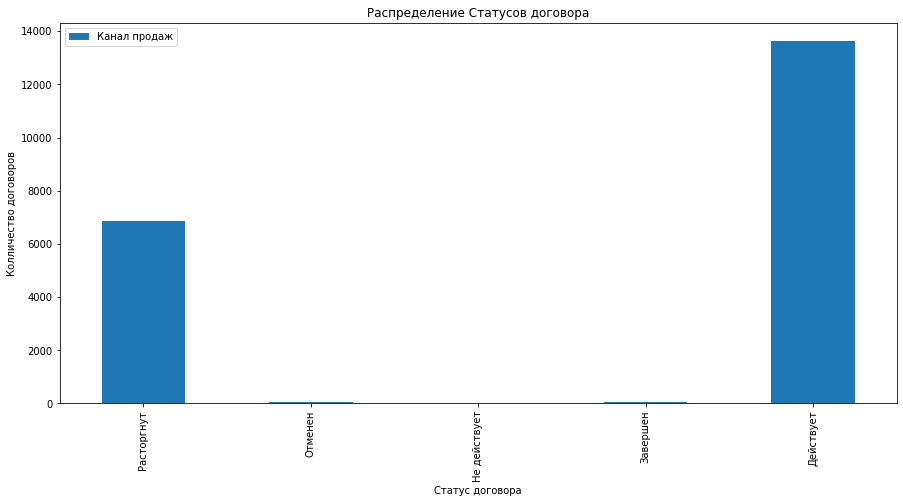

In [21]:
sale.groupby('Статус договора').agg({'Канал продаж' : 'count'}).sort_values(
    by='Статус договора', ascending=False).plot(kind='bar', figsize=(15, 7))
plt.xlabel('Статус договора')
plt.ylabel('Колличество договоров')
plt.title('Распределение Статусов договора');
plt.show()

Построю тепловую карту по категориям статуса договора и агентам

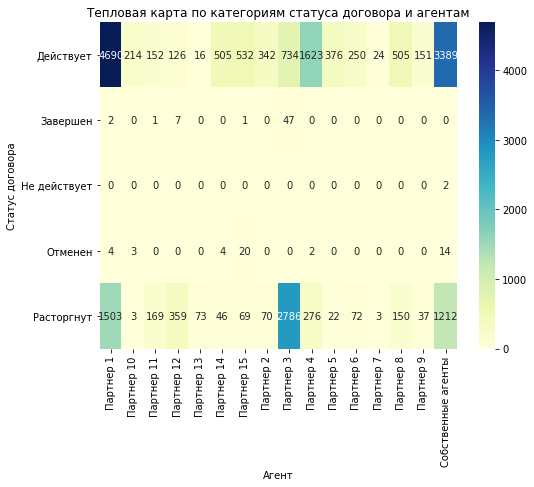

In [22]:
cross_tab = pd.crosstab(sale['Статус договора'], sale['Агент'])


plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Тепловая карта по категориям статуса договора и агентам')
plt.xlabel('Агент')
plt.ylabel('Статус договора')
plt.show()

Видим большое колличество расторгнутых полисов, нужно понять причины и предложить решения проблемы

Посмотрю процент расторгнутых контрактов: по срокам полисов, каналу продаж и агенту

In [24]:
canceled_contracts = sale[sale['Статус договора'] == 'Расторгнут']['Срок полиса'].value_counts()
total=sale['Срок полиса'].value_counts()
percentages=(canceled_contracts/total)*100
sort_percentages=percentages.sort_values(ascending=False)
print("Процент расторгнутых договоров по сроку полисов:")
print(sort_percentages)

Процент расторгнутых договоров по сроку полисов:
от 3 до 5 лет     62.994225
от 5 до 10 лет    42.782027
3 года            27.183513
до 3 лет          23.721747
5 лет             21.879718
10 лет и более     4.700855
Name: Срок полиса, dtype: float64


In [25]:
canceled_contracts = sale[sale['Статус договора'] == 'Расторгнут']['Канал продаж'].value_counts()
total=sale['Канал продаж'].value_counts()
percentages=(canceled_contracts/total)*100
sort_percentages=percentages.sort_values(ascending=False)
print("Процент расторгнутых договоров по каждому каналу продаж:")
print(sort_percentages)

Процент расторгнутых договоров по каждому каналу продаж:
Брокерский        68.307949
Агентская сеть    42.775510
Банковский        21.152470
Корпоративный      7.568066
Name: Канал продаж, dtype: float64


In [26]:
canceled_contracts = sale[sale['Статус договора'] == 'Расторгнут']['Агент'].value_counts()
total=sale['Агент'].value_counts()
percentages=(canceled_contracts/total)*100
sort_percentages=percentages.sort_values(ascending=False)
print("Процент расторгнутых договоров по каждому Агенту:")
print(sort_percentages)

Процент расторгнутых договоров по каждому Агенту:
Партнер 13            82.022472
Партнер 3             78.104850
Партнер 12            72.967480
Партнер 11            52.484472
Собственные агенты    26.250812
Партнер 1             24.245846
Партнер 8             22.900763
Партнер 6             22.360248
Партнер 9             19.680851
Партнер 2             16.990291
Партнер 4             14.518674
Партнер 7             11.111111
Партнер 15            11.093248
Партнер 14             8.288288
Партнер 5              5.527638
Партнер 10             1.363636
Name: Агент, dtype: float64


Вывод:
- Самые большие проценты расторгнутых договоров по сроку полисов: от 3 до 5 лет и от 5 до 10 лет. Смею предположить, что это продукты направления ИСН НСЖ.
- Самый большой процент расторгнутых договоров по каждому каналу продаж: Брокерский и Агентская сеть
- Самый большой процент расторгнутых договоров по агенту: Партнер 13 и Партнер 3

Предлагаемые сценарии решения проблемы:
- Провести ряд мероприятий(обучения, вебинары, конкурсы) для брокерского и агентского канала для прорабоки конверсии в пролонгацию актуальных договоров
- Рассмотреть актуальность наличия в порфетел Партнера 13 и 3. Их прибыль минимальна, а колличество расторгнутых полисов достаточно высоко. Нужно оценить силы, которые тратятся на работу с этими каналами и на их основании согласовать план работы с этими партнерами
- Проработать доп стимуляцию для пролонгации полисов от 3 до 5 лет и от 5 до 10, предложить клиентом бонусы, подарки, дополнительные привелегии

Проведу проверку нескольких гипотез

H_0: Есть статистически значимые различия между премиями по полисам для разных каналов продаж.
H_1: Нет статистически значимых различий между премиями по полисам для разных каналов продаж. 
alpha = 0.05

In [29]:
channel_groups = [sale[sale['Канал продаж'] == channel]['Премия по полису'] for channel in sale['Канал продаж'].unique()]

f_statistic, p_value = f_oneway(*channel_groups)


if p_value < 0.05:
    print(f"Есть статистически значимые различия между премиями по полисам для разных каналов продаж (p-value = {p_value}).")
else:
    print(f"Нет статистически значимых различий между премиями по полисам для разных каналов продаж (p-value = {p_value}).")

Есть статистически значимые различия между премиями по полисам для разных каналов продаж (p-value = 7.935754650883787e-10).


H_0: Есть статистически значимые различия между премиями по полисам для разных Агентов.
H_1: Нет статистически значимых различий между премиями по полисам для разных Агентов. 
alpha = 0.05

In [30]:
channel_groups = [sale[sale['Агент'] == channel]['Премия по полису'] for channel in sale['Агент'].unique()]

f_statistic, p_value = f_oneway(*channel_groups)


if p_value < 0.05:
    print(f"Есть статистически значимые различия между премиями по полисам для разных агентов (p-value = {p_value}).")
else:
    print(f"Нет статистически значимых различий между премиями по полисам для разных агентов (p-value = {p_value}).")

Есть статистически значимые различия между премиями по полисам для разных агентов (p-value = 3.435388394976136e-19).


H_0: нет статистически значимой разницы в выручке между типами бизнеса. 
H_1: существует статистически значимая разница в выручке между типами бизнеса.
alpha = 0.05

In [31]:
business_type_groups = sale.groupby('Тип бизнеса')['Премия по полису'].apply(list)
f_statistic, p_value = f_oneway(*business_type_groups)


print("F-статистика:", f_statistic)
print("p-value:", p_value)

alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница в выручке между типами бизнеса.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: нет статистически значимой разницы в выручке между типами бизнеса.")

F-статистика: 24.310734539889985
p-value: 8.261902900866696e-07
Отвергаем нулевую гипотезу: существует статистически значимая разница в выручке между типами бизнеса.


Вывод: 
На основании гипотез, можем сделать следующие выводы:
Существует статистически значимая разница в выручке между типами бизнеса.
Есть статистически значимые различия между премиями по полисам для разных каналов продаж.
Есть статистически значимые различия между премиями по полисам для разных агентов.

Вывод по проделанной работе:
На первом этапе работы была проведена предобработка данных, удалены пустые ячейки(их процент был 0.4 от общего количества, это количество не влияет на финальный анализ данных), преведены колонки к актуальному типу данных для комфортного анализа.
Также были проверены данные на наличие дубликатов. 

Далее - анализ данных.

Проведена оценка колличества продаж, суммы продаж и среднего значения премии за актуальные периоды
Построен график распределия продаж по полисам в разрезе месяца и на основании этого сделаны следующие выводы:
- Топ 3 месяца по колличеству продаж:  2021-01-01, 2021-02-01, 2022-03-01
- Топ 3 месяца по суммме продаж: 2021-02-01, 2021-01-01,2022-03-01	
- Топ 3 месяца по среднему "чеку": 2021-02-01, 2022-01-01,2022-03-01

Проведен комплексный анализ зависимостей премий по полисам в зависимости от разных критериев:
- Распределение премий по полису в разрезе Типов премий
- Распределение премий по полису в разрезе Каналов продаж
- Распределение премий по полису в разрезе Продуктов
- Распределение премий по полису в разрезе Агентов
- диаграмму продаж для Партнера 1 (как для канала с наибольшей суммарной премией)

По результатам проведенного анализа можно увидеть, что ключевыми продуктами являются Кредитное и Инвестиционное страхование, и, как видно по графикам, основным каналом является Банковский(что весьма логично для актуальных продуктов)
По партнерам можно увидеть явных лидеров, "Партнер 1" и Собственные агенты.


Проведен анализ статусов договора
Сделан вывод, что существует большое колиичество расторгнутых договоров, на основании чего решено проверить причины
- Построена тепловая карта по категориям статуса договора и агентам
- Построен процент расторгнутых контрактов: по срокам полисов, каналу продаж и агенту.
На основании проделанной работы сформированы следующие выводы и предложены решения.
Вывод:
- Самые большие проценты расторгнутых договоров по сроку полисов: от 3 до 5 лет и от 5 до 10 лет. Смею предположить, что это продукты направления ИСН НСЖ.
- Самый большой процент расторгнутых договоров по каждому каналу продаж: Брокерский и Агентская сеть
- Самый большой процент расторгнутых договоров по агенту: Партнер 13 и Партнер 3

Предлагаемые сценарии решения проблемы:
- Провести ряд мероприятий(обучения, вебинары, конкурсы) для брокерского и агентского канала для прорабоки конверсии в пролонгацию актуальных договоров
- Рассмотреть актуальность наличия в порфетел Партнера 13 и 3. Их прибыль минимальна, а колличество расторгнутых полисов достаточно высоко. Нужно оценить силы, которые тратятся на работу с этими каналами и на их основании согласовать план работы с этими партнерами
- Проработать доп стимуляцию для пролонгации полисов от 3 до 5 лет и от 5 до 10, предложить клиентом бонусы, подарки, дополнительные привелегии

Предложены и проведены несколько гипотез.
На основании гипотез возможно сформулировать следующие выводы:
Существует статистически значимая разница в выручке между типами бизнеса.
Есть статистически значимые различия между премиями по полисам для разных каналов продаж.
Есть статистически значимые различия между премиями по полисам для разных агентов.